In [443]:
import numpy as np
from matplotlib import pyplot as plt

In [444]:
class Cube_Polinomial:
    def __init__(self):
        self.T = np.zeros((4, 4))
        self.v = np.zeros((4, 1))
        self.V = 0
        self.n = 0
    def add(self, x, y):
        self.T += np.array([[1, x, x**2, x**3], [x, x**2, x**3, x**4], [x**2, x**3, x**4, x**5], [x**3, x**4, x**5, x**6]])
        self.v += np.array([[y], [y * x], [y * x**2], [y * x**3]])
        self.V += y**2
        self.n += 1
    def get_weights(self):
        return np.linalg.inv(self.T) @ self.v

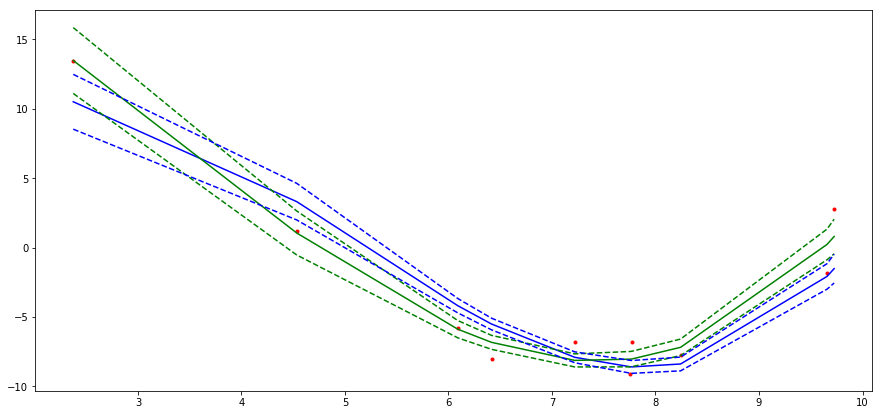

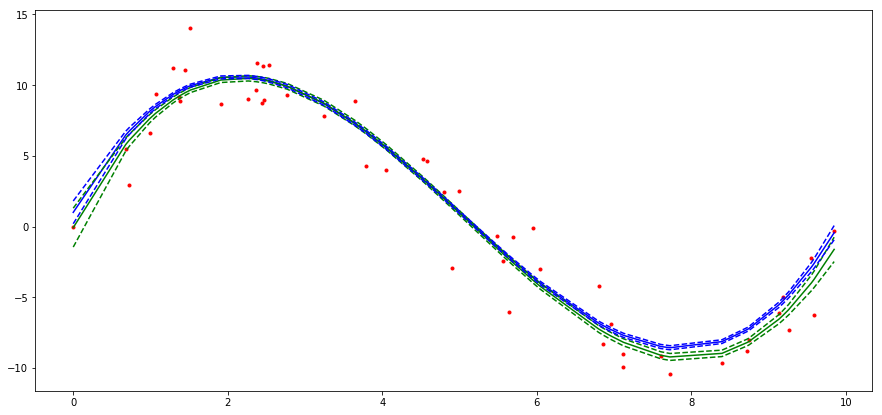

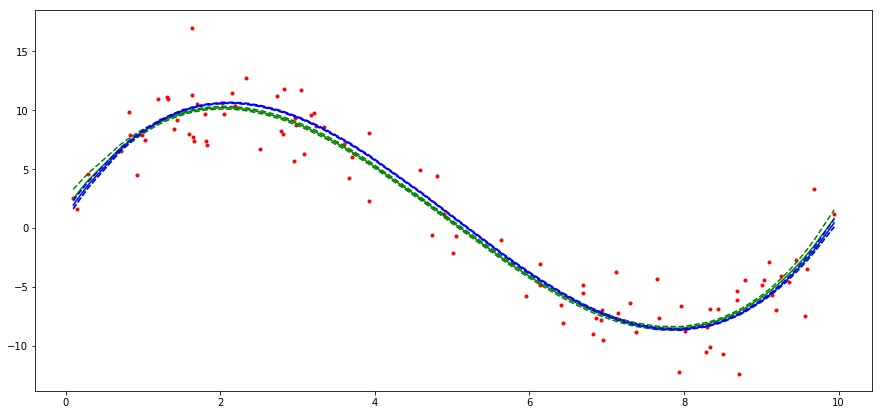

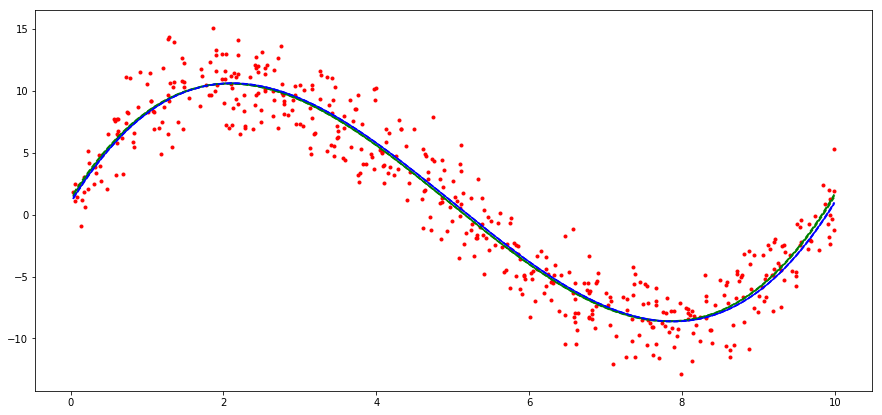

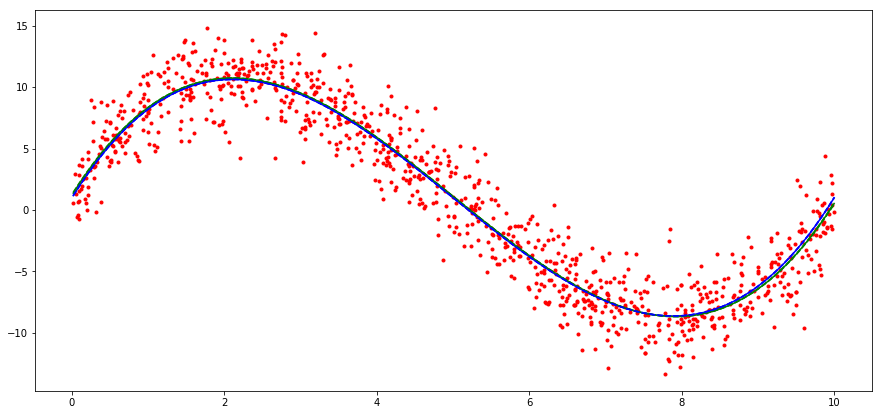

In [445]:
sigma = 2
np.random.seed(13)
for i in [10, 50, 100, 500 ,1000]:
    x = np.sort(np.random.rand(i)*10)
    y_true = 0.2 * x**3 - 3 * x**2 + 10 * x + 1
    y = y_true + np.random.randn(i)*sigma

    test = Cube_Polinomial()
    for i, j in zip(x, y):
        test.add(i, j)

    y_hat = np.array([])
    for i in x:
        y_hat = np.append(y_hat, np.array([[1, i, i**2, i**3]]) @ test.get_weights())
    sigma_y_hat = np.array([])
    for i in x:
        sigma_y_hat = np.append(sigma_y_hat, (test.V - test.v.T @ np.linalg.inv(test.T) @ test.v)/(test.n - 4) *
                                   np.array([[1, i, i**2, i**3]]) @ np.linalg.inv(test.T) @ np.array([[1], [i], [i**2], [i**3]]))
    sigma_y_true = np.array([])
    for i in x:
        sigma_y_true = np.append(sigma_y_true, sigma * np.array([[1, i, i**2, i**3]]) @ np.linalg.inv(test.T) @ np.array([[1], [i], [i**2], [i**3]]))

    plt.figure(figsize=(15, 7))
    plt.plot(x, y, 'r.')
    plt.plot(x, y_true, 'b-')
    plt.plot(x, y_hat, 'g-')
    plt.plot(x, y_hat + sigma_y_hat, 'g--')
    plt.plot(x, y_hat - sigma_y_hat, 'g--')
    plt.plot(x, y_true + sigma_y_true, 'b--')
    plt.plot(x, y_true - sigma_y_true, 'b--')
    plt.show()